In [8]:
from neo4j import GraphDatabase
import pandas as pd
import numpy as np

In [9]:
uri = "bolt://34.128.111.121:7687"
username = "neo4j"
password = "unej1234"

driver = GraphDatabase.driver(uri, auth=(username, password))

In [10]:
def extract_node_properties():
    with driver.session() as session:
        # Cypher query to fetch node properties
        query = """
        MATCH (n)
        RETURN n.Vector AS vector, n.label AS label, labels(n) AS kelas, n.abstract AS keterangan
        """
        result = session.run(query)
        # Extract properties and store in DataFrame
        df = pd.DataFrame([record.values() for record in result], columns=result.keys())
        return df


In [11]:
node_df = extract_node_properties()
cleaned_kelas = node_df['kelas'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
node_df['kelas'] = cleaned_kelas
node_df

,vector,label,kelas,keterangan
0,"[-0.08210227638483047, -1.196730375289917, 0.4...",Metalaxyl,[Fungisida],Metalaxyl adalah sejenis fungisida yang diguna...
1,"[0.07298001646995544, -1.2374435663223267, 0.7...",Gosong bulir,[PenyakitPadi],"Penyakit gosong bulir padi, juga dikenal sebag..."
2,"[-0.17221221327781677, -0.11851631850004196, -...",Acidovorax avenae subsp. avenae,[PatogenPadi],Acidovorax avenae subsp. avenae adalah bakteri...
3,"[0.09642044454813004, -0.09432632476091385, -0...",Tanaman layu,[Gejala],Gejala layu pada tanaman padi adalah tanda yan...
4,"[-0.028699690476059914, -0.9930149912834167, -...",Bibit mati,[Gejala],Gejala kematian bibit padi dapat terlihat dala...
...,...,...,...,...
111,"[0.06340976804494858, -0.9591665863990784, -1....",Bacillus thuringiensis var. israelensis,[Pestisida],Bacillus thuringiensis var. israelensis (Bti) ...
112,"[0.26280516386032104, 0.8804101943969727, 0.96...",Belalang Sawah,[HamaPadi],"Belalang sawah, atau Nilaparvata lugens, adala..."
113,"[0.5597228407859802, 0.4738956689834595, -0.00...",Bakteri Garis Daun,[PenyakitPadi],Penyakit bakteri garis daun pada padi disebabk...
114,"[0.22912395000457764, -0.31869229674339294, -0...",Fusarium spp.,[PatogenPadi],Fusarium spp. adalah kelompok jamur patogen ya...


In [12]:
def extract_node_properties_and_relationships():
    with driver.session() as session:
        # Cypher query to fetch node properties and relationships
        query = """
            MATCH (n)-[r]->(m)
            RETURN n.Vector AS source_vector, n.label AS source_label, labels(n) AS source_class, 
                type(r) AS relationship_type,
                m.Vector AS target_vector, m.label AS target_label, labels(m) AS target_class
        """
        result = session.run(query)
        # Extract properties and relationships and store in DataFrame
        df = pd.DataFrame([record.values() for record in result], columns=result.keys())
        # Clean labels
        df['source_class'] = df['source_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        df['target_class'] = df['target_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        return df

# Call the function to extract node properties and relationships
Rice_KG_df = extract_node_properties_and_relationships()

# Print the DataFrame
Rice_KG_df


,source_vector,source_label,source_class,relationship_type,target_vector,target_label,target_class
0,"[0.07298001646995544, -1.2374435663223267, 0.7...",Gosong bulir,[PenyakitPadi],memilikiGejala,"[0.03470959886908531, -1.1857260465621948, 0.8...",Bulir pecah,[Gejala]
1,"[0.07298001646995544, -1.2374435663223267, 0.7...",Gosong bulir,[PenyakitPadi],memilikiGejala,"[0.13574755191802979, -1.3793666362762451, 1.0...",Bulir terdapat bercak,[Gejala]
2,"[0.07298001646995544, -1.2374435663223267, 0.7...",Gosong bulir,[PenyakitPadi],terkenaPatogen,"[0.06818187981843948, -1.526533842086792, 0.76...",Tilletia barclayana,[PatogenPadi]
3,"[0.07298001646995544, -1.2374435663223267, 0.7...",Gosong bulir,[PenyakitPadi],memilikiGejala,"[-0.10305600613355637, -0.9914171099662781, 0....",Bulir berubah warna,[Gejala]
4,"[0.07298001646995544, -1.2374435663223267, 0.7...",Gosong bulir,[PenyakitPadi],memilikiGejala,"[0.08502250909805298, -1.3067476749420166, 0.5...",Bulir mengalami kerusakan,[Gejala]
...,...,...,...,...,...,...,...
162,"[0.5597228407859802, 0.4738956689834595, -0.00...",Bakteri Garis Daun,[PenyakitPadi],terkenaPatogen,"[0.66168212890625, 0.46271994709968567, 0.3153...",Xanthomonas oryzae pv. oryzicola,[PatogenPadi]
163,"[0.5597228407859802, 0.4738956689834595, -0.00...",Bakteri Garis Daun,[PenyakitPadi],memilikiGejala,"[0.15162724256515503, -0.20435462892055511, 0....",Malai mengalami kerusakan,[Gejala]
164,"[0.5597228407859802, 0.4738956689834595, -0.00...",Bakteri Garis Daun,[PenyakitPadi],memilikiGejala,"[0.3585258722305298, 0.6639047861099243, 0.411...",Daun menguning,[Gejala]
165,"[0.5597228407859802, 0.4738956689834595, -0.00...",Bakteri Garis Daun,[PenyakitPadi],memilikiGejala,"[0.03997558727860451, 0.41051343083381653, -0....",Daun terdapat bercak,[Gejala]


In [13]:
def extract_node_properties_and_relationships():
    with driver.session() as session:
        # Cypher query to fetch node properties and relationships
        query = """
        MATCH (n)-[r]->(m)
            WHERE any(label IN labels(n) WHERE label IN ['Gejala', 'PenyakitPadi', 'HamaPadi']) 
            AND any(label IN labels(m) WHERE label IN ['Gejala', 'PenyakitPadi', 'HamaPadi'])
        RETURN 
        m.Vector AS source_vector, m.label AS source_label, labels(m) AS source_class, 
        type(r) AS relationship_type,
        n.Vector AS target_vector, n.label AS target_label, labels(n) AS target_class

        """
        result = session.run(query)
        # Extract properties and relationships and store in DataFrame
        df = pd.DataFrame([record.values() for record in result], columns=result.keys())
        # Clean labels
        df['source_class'] = df['source_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        df['target_class'] = df['target_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        return df

# Call the function to extract node properties and relationships
Rice_KG_df = extract_node_properties_and_relationships()

# Print the DataFrame
Rice_KG_df


,source_vector,source_label,source_class,relationship_type,target_vector,target_label,target_class
0,"[0.03470959886908531, -1.1857260465621948, 0.8...",Bulir pecah,[Gejala],memilikiGejala,"[0.07298001646995544, -1.2374435663223267, 0.7...",Gosong bulir,[PenyakitPadi]
1,"[0.13574755191802979, -1.3793666362762451, 1.0...",Bulir terdapat bercak,[Gejala],memilikiGejala,"[0.07298001646995544, -1.2374435663223267, 0.7...",Gosong bulir,[PenyakitPadi]
2,"[-0.10305600613355637, -0.9914171099662781, 0....",Bulir berubah warna,[Gejala],memilikiGejala,"[0.07298001646995544, -1.2374435663223267, 0.7...",Gosong bulir,[PenyakitPadi]
3,"[0.08502250909805298, -1.3067476749420166, 0.5...",Bulir mengalami kerusakan,[Gejala],memilikiGejala,"[0.07298001646995544, -1.2374435663223267, 0.7...",Gosong bulir,[PenyakitPadi]
4,"[0.4479781985282898, 0.31867894530296326, 0.02...",Daun terdapat garis,[Gejala],memilikiGejala,"[-0.00347538897767663, 0.01217570248991251, -0...",Garis Merah,[PenyakitPadi]
...,...,...,...,...,...,...,...
79,"[-0.1632845550775528, -0.05104042589664459, 0....",Batang mengalami kerusakan,[Gejala],memilikiGejala,"[0.5597228407859802, 0.4738956689834595, -0.00...",Bakteri Garis Daun,[PenyakitPadi]
80,"[0.15162724256515503, -0.20435462892055511, 0....",Malai mengalami kerusakan,[Gejala],memilikiGejala,"[0.5597228407859802, 0.4738956689834595, -0.00...",Bakteri Garis Daun,[PenyakitPadi]
81,"[0.3585258722305298, 0.6639047861099243, 0.411...",Daun menguning,[Gejala],memilikiGejala,"[0.5597228407859802, 0.4738956689834595, -0.00...",Bakteri Garis Daun,[PenyakitPadi]
82,"[0.03997558727860451, 0.41051343083381653, -0....",Daun terdapat bercak,[Gejala],memilikiGejala,"[0.5597228407859802, 0.4738956689834595, -0.00...",Bakteri Garis Daun,[PenyakitPadi]


In [22]:
###     RANDOM FOREST   ###

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Convert source and target vectors to numpy arrays
source_vectors = np.array(Rice_KG_df['source_vector'].tolist())
target_vectors = np.array(Rice_KG_df['target_vector'].tolist())

# Concatenate source and target vectors as features
X = np.concatenate([source_vectors, target_vectors], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Rice_KG_df['relationship_type'])

# Perform cross-validation
rf_accuracy = cross_val_score(RandomForestClassifier(), X, y, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-validation scores:", rf_accuracy)
print("Mean accuracy:", np.mean(rf_accuracy))

Cross-validation scores: [0.88235294 0.88235294 0.88235294 0.94117647 0.8125    ]
Mean accuracy: 0.8801470588235294


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [25]:
###     DECISION TREE   ###

from sklearn.tree import DecisionTreeClassifier

# Convert source and target vectors to numpy arrays
source_vectors = np.array(Rice_KG_df['source_vector'].tolist())
target_vectors = np.array(Rice_KG_df['target_vector'].tolist())

# Concatenate source and target vectors as features
X = np.concatenate([source_vectors, target_vectors], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Rice_KG_df['relationship_type'])

# Perform cross-validation
dt_accuracy = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-validation scores:", dt_accuracy)
print("Mean accuracy:", np.mean(dt_accuracy))

Cross-validation scores: [0.82352941 0.94117647 0.64705882 0.94117647 0.8125    ]
Mean accuracy: 0.8330882352941176


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [16]:
#Neural Network

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Concatenate source and target vectors as features
X = np.concatenate([Rice_KG_df['source_vector'].values.tolist(), Rice_KG_df['target_vector'].values.tolist()], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Rice_KG_df['relationship_type'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax') # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse categorical crossentropy for integer-encoded labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Evaluate the model
loss, nn_accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", nn_accuracy)


Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1396 - loss: 1.6877  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.5029 - loss: 1.4043
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.7945 - loss: 1.1799
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.9046 - loss: 0.9211
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.8491 - loss: 0.8313
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.9142 - loss: 0.5820
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.9229 - loss: 0.4681
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.8942 - loss: 0.4543
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.8951 - loss: 0.4372
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8777 - loss: 0.4704 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.8968 - loss: 0.3905
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.8838 - los

In [17]:
#CNN

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout

# Reshape the input data to be suitable for a 1D CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse categorical crossentropy for integer-encoded labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Evaluate the model
loss, cnn_accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", cnn_accuracy)


Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2692 - loss: 1.6033  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.7797 - loss: 1.3824
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8728 - loss: 1.1353 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8398 - loss: 0.9134
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8638 - loss: 0.6801 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.9081 - loss: 0.5171
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8647 - loss: 0.6615
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8899 - loss: 0.5298
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8508 - loss: 0.7181 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8578 - loss: 0.6291 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8786 - loss: 0.4932 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.8699 - loss: 0.4951


In [18]:
#RNN

from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential

# Reshape the input data to be suitable for an RNN (assuming sequential data)
X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the RNN model
model = Sequential([
    LSTM(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Dense(len(np.unique(y_train)), activation='softmax')  # Adjust output units to match the number of unique classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer-encoded labels
              metrics=['accuracy'])

# Train the model using the reshaped data
model.fit(X_train_rnn, y_train, epochs=100, batch_size=16, verbose=1)

# Evaluate the model using the reshaped test data
loss, rnn_accuracy = model.evaluate(X_test_rnn, y_test)
print("Accuracy:", rnn_accuracy)


Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.2577 - loss: 1.5980
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.7732 - loss: 1.5233
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.9125 - loss: 1.4535
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.8786 - loss: 1.3975
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.8647 - loss: 1.3247
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.8821 - loss: 1.2431
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.8916 - loss: 1.1506
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.8899 - loss: 1.0703
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8664 - loss: 1.0184 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.8942 - loss: 0.8964
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.8821 - loss: 0.8353
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.8908 - los

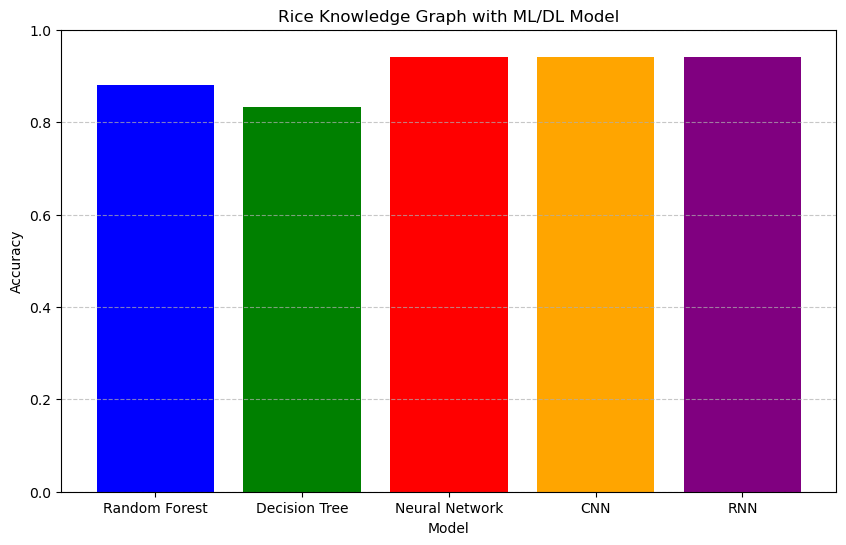

In [26]:
import matplotlib.pyplot as plt

# Assuming you have the accuracy scores of four other models stored in variables

# Define the model names
model_names = ['Random Forest', 'Decision Tree', 'Neural Network', 'CNN', 'RNN']

# Define the accuracy scores
accuracy_scores = [np.mean(rf_accuracy), np.mean(dt_accuracy), nn_accuracy, cnn_accuracy, rnn_accuracy]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Rice Knowledge Graph with ML/DL Model')
plt.ylim(0, 1)  # Set the y-axis limits to ensure all bars are visible
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
